In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
print("succesfully installed")

succesfully installed


In [4]:
data = pd.read_csv("C:/Pythonprog.py/Breast_Cancer.csv")

In [5]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
data.isnull().sum()


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [9]:
#Making a Regression Model
#One Hot Encoding
categorical_columns = ['Race', 'Marital Status', 'T Stage ', 'N Stage', 'differentiate', 
                       'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [10]:
# Encode the target column (6th Stage) using LabelEncoder
label_encoder = LabelEncoder()
data_encoded['6th Stage'] = label_encoder.fit_transform(data['6th Stage'])



# Separate features and target
X = data_encoded.drop(['6th Stage'], axis=1)
y = data_encoded['6th Stage']

In [11]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize numerical features (SVM works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train SVM model (RBF Kernel for non-linearity)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [14]:
# Predictions
y_pred = svm_model.predict(X_test)

In [15]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9975


In [16]:
# making classifiaction report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      0.99      1.00       222
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        83

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



In [17]:
# confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[275   0   0   0   0]
 [  1 220   1   0   0]
 [  0   0 220   0   0]
 [  0   0   0   5   0]
 [  0   0   0   0  83]]


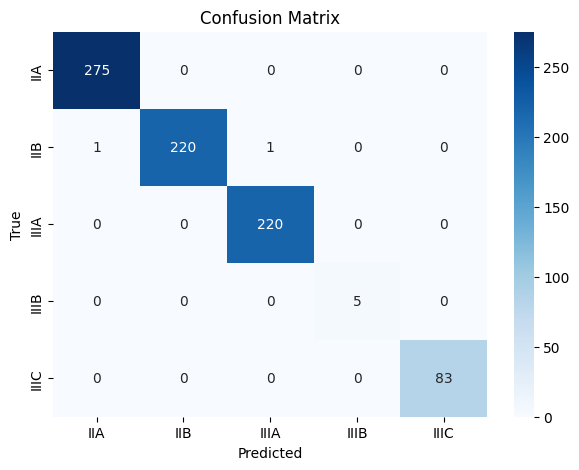

Accuracy: 0.9975


In [18]:
# Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display accuracy
print(f"Accuracy: {accuracy:.4f}")


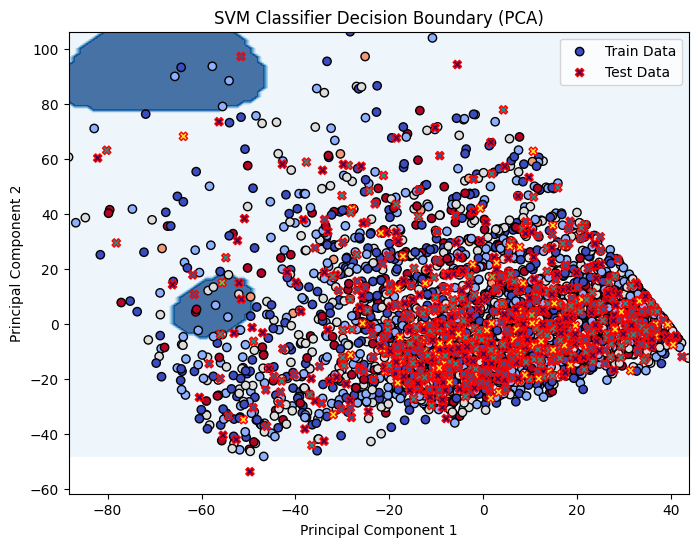

In [19]:
from sklearn.decomposition import PCA
# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split data into train and test for 2D plot
X_train_pca, X_test_pca = X_pca[:len(X_train)], X_pca[len(X_train):]
y_train_pca, y_test_pca = y_train, y_test

# Train the SVM model on reduced features
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_pca, y_train_pca)

# Visualize Decision Boundary
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100),
                     np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap='Blues')

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, edgecolors='k', marker='o', cmap='coolwarm', label='Train Data')
# Plot the test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, edgecolors='r', marker='X', label='Test Data')

plt.title("SVM Classifier Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
